In [1]:
from pandas import Timedelta
%load_ext autoreload
%autoreload 2

In [ ]:
from pm4py import DcrGraph
graph = DcrGraph()
graph.events.add("A")
graph.events.add("B")
graph.events.add("C")
graph.events.add("D")
graph.labels.add("activity1")
graph.labels.add("activity2")
graph.labels.add("activity3")
graph.label_map["activity1"] = {"A"}
graph.label_map["activity2"] = {"B"}
graph.label_map["activity3"] = {"C"}
graph.conditions["A"] = set("B")
graph.conditions["B"] = set("C")
graph.responses["A"] = set("C")
graph.excludes["C"] = set("B")
graph.conditions["A"].add("D")
graph.includes["A"] = set("C")
graph.marking.included.add("A")
graph.marking.included.add("B")
graph.marking.included.add("C")
graph.marking.included.add("D")
print(graph)

In [ ]:
print(graph.get_constraints())
print(graph.get_event("A"))
print(graph.get_activity("activity1"))
del graph

In [1]:
import pm4py

log = pm4py.read_xes("../tests/input_data/running-example.xes")
graph, _ = pm4py.discover_dcr(log)
print(graph)
del graph

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

events: {'check ticket', 'register request', 'pay compensation', 'examine casually', 'examine thoroughly', 'decide', 'reject request', 'reinitiate request'}
marking: {executed: set(), included: {'check ticket', 'register request', 'pay compensation', 'examine casually', 'examine thoroughly', 'decide', 'reject request', 'reinitiate request'}, pending: set()}
labels: {'check ticket', 'register request', 'pay compensation', 'examine casually', 'examine thoroughly', 'decide', 'reject request', 'reinitiate request'}
conditionsFor: {'pay compensation': {'decide'}, 'reinitiate request': {'decide'}, 'reject request': {'decide'}, 'decide': {'check ticket', 'examine casually'}, 'check ticket': {'register request'}, 'examine casually': {'register request'}, 'examine thoroughly': {'register request'}}
responseTo: {'register request': {'check ticket'}, 'reinitiate request': {'check ticket'}, 'check ticket': {'decide'}, 'examine casually': {'decide'}, 'examine thoroughly': {'decide'}}
includesTo: {'

In [5]:
graph, _ = pm4py.discover_dcr(log,post_process={'roles'},group_key="org:resource")
print(graph['principalsAssignments'])
del graph

{'Sara': {'Sara'}, 'Sue': {'Sue'}, 'Mike': {'Mike'}, 'Ellen': {'Ellen'}, 'Sean': {'Sean'}, 'Pete': {'Pete'}}


In [ ]:
from pm4py.algo.discovery.dcr_discover.extenstions.nesting import NestVariants
graph, _ = pm4py.discover_dcr(log,post_process={'roles','time','pending','nesting'},group_key="org:resource",
                              parameters={"nest_variant":NestVariants.CHOICE_NEST})
print(graph)
del graph

In [ ]:
graph, _ = pm4py.discover_dcr(log)
graph

In [ ]:
pm4py.save_vis_dcr(graph,'here.png')

In [ ]:
pm4py.view_dcr(graph)

In [14]:
from pm4py.objects.dcr.utils.utils import time_to_iso_string
from pandas import Timedelta

time_to_iso_string(Timedelta(days=0,hours=0,seconds=0), time_precision='S')

'P0DT0H0M0S'

In [ ]:
import pm4py

log = pm4py.read_xes("../tests/input_data/running-example.xes")
graph, _ = pm4py.discover_dcr(log,post_process={'roles','pending','timed'},group_key="org:resource")

In [33]:
graph.marking.executed.add('examine casually')

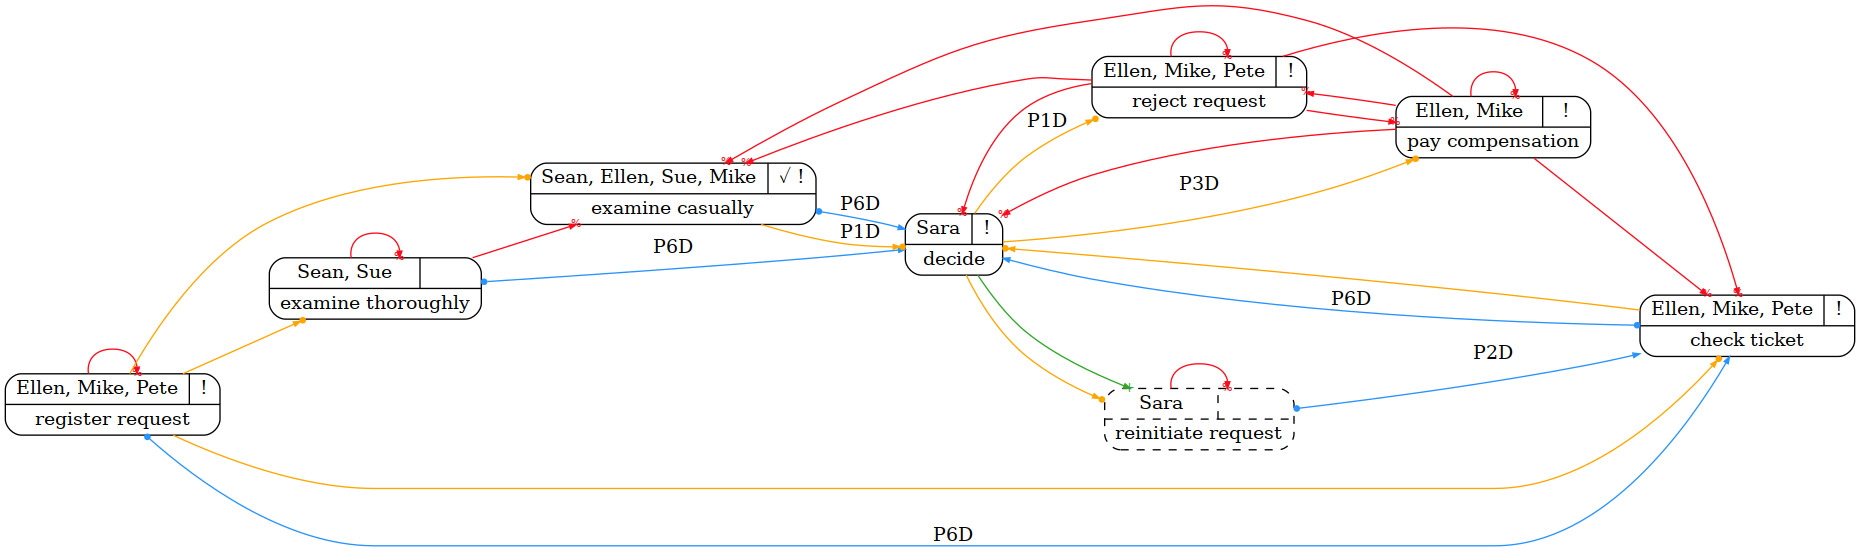

''

In [41]:
pm4py.view_dcr(graph)
pm4py.save_vis_dcr(graph,'img/dcr_running_example.png')

In [48]:
import pm4py 
from pm4py.objects.dcr.exporter import exporter as dcr_exporter 

log = pm4py.read_xes("../tests/input_data/running-example.xes") 
graph, _ = pm4py.discover_dcr(log)
path = '../tests/test_output_data/dcrgraph.xml' 
print(graph.events)
pm4py.write_dcr_xml(graph, path, variant=dcr_exporter.DCR_JS_PORTAL, dcr_title='dcrgraph')
print(graph.events)

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

{'examine thoroughly', 'reinitiate request', 'register request', 'reject request', 'examine casually', 'pay compensation', 'check ticket', 'decide'}
{'examine thoroughly', 'reinitiate request', 'register request', 'reject request', 'examine casually', 'pay compensation', 'check ticket', 'decide'}


In [ ]:
import pm4py

log = pm4py.read_xes("/home/vco/Datasets/12683249/Road_Traffic_Fine_Management_Process.xes")

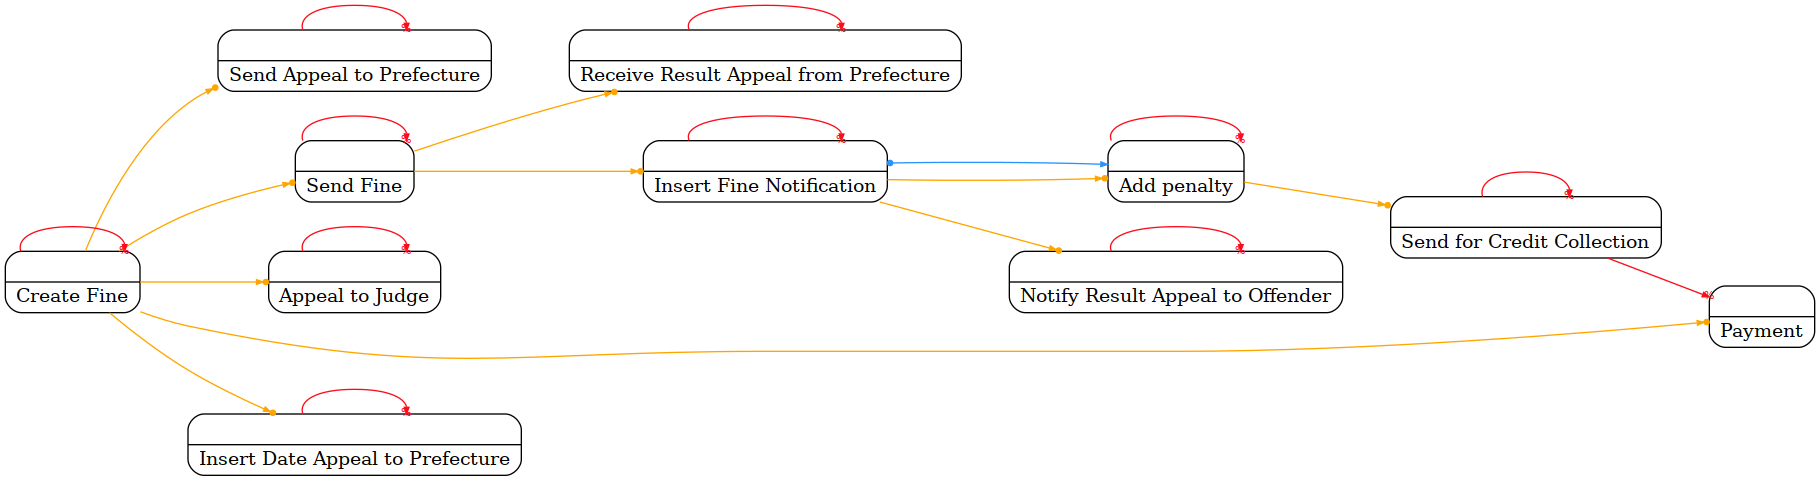

''

In [20]:
graph, _ = pm4py.discover_dcr(log)
pm4py.view_dcr(graph)
pm4py.save_vis_dcr(graph,'img/rtfmp.png')

parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

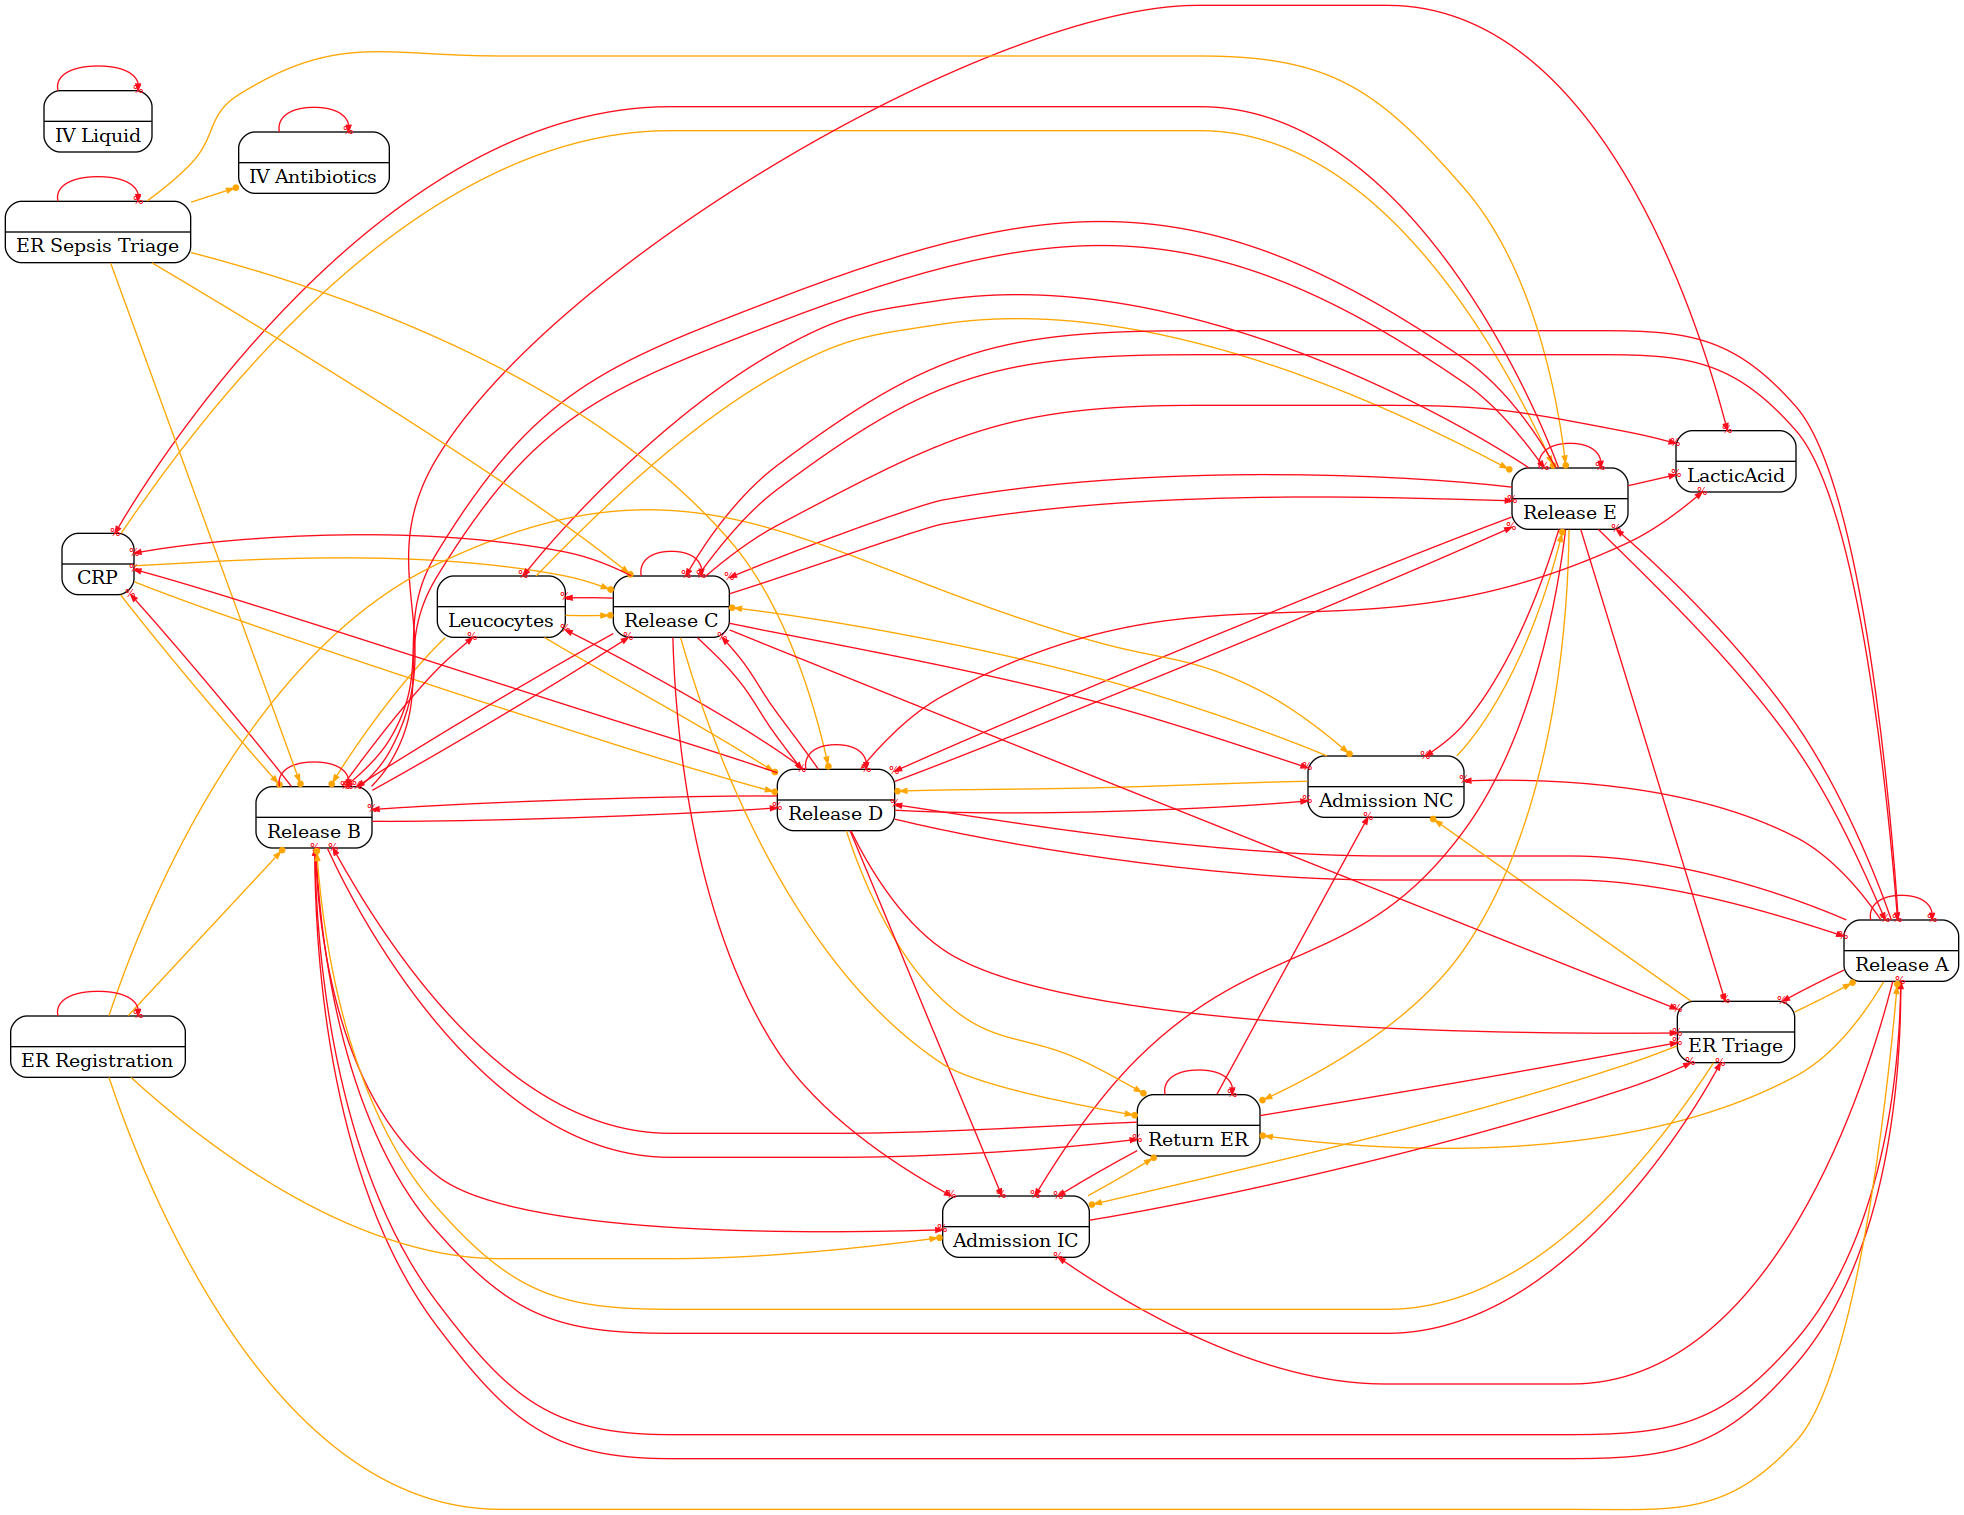

''

In [9]:
import pm4py

log = pm4py.read_xes("/home/vco/Datasets/Sepsis Cases - Event Log.xes")
graph, _ = pm4py.discover_dcr(log)
pm4py.view_dcr(graph)
pm4py.save_vis_dcr(graph,'img/sepsis.png')

In [11]:
import pm4py

log = pm4py.read_xes("/home/vco/Datasets/Dreyers Foundation.xes")
graph, _ = pm4py.discover_dcr(log)
pm4py.view_dcr(graph)
pm4py.save_vis_dcr(graph,'img/dreyers.png')

parsing log, completed traces ::   0%|          | 0/700 [00:00<?, ?it/s]

Exception: the dataframe should (at least) contain a column of type date

In [ ]:
import pm4py

log = pm4py.read_xes("/home/vco/Datasets/BPI Challenge 2017 - Offer log.xes")
graph, _ = pm4py.discover_dcr(log)


In [18]:
graph.marking.pending.add('O_Create Offer')
graph.marking.included.add('O_Created')

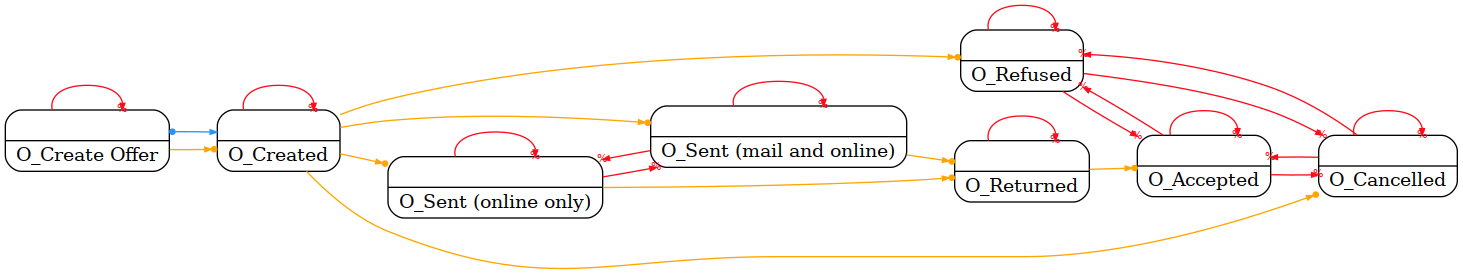

''

In [19]:
pm4py.view_dcr(graph)
pm4py.save_vis_dcr(graph,'img/bpic17o.png')